In [1]:
#Hello everyone!  This is the neural network lab!
#I'll walk you through an example using the mnist dataset.
#First, we need to install mnist as it is not included in Google Colab by default.
#The "!" at the start of this line instructs Colab to execute a shell command.
!pip install mnist
!pip install keras
!pip install tensorflow
#Now, mnist should be downloaded and installed as a python package.
#Python has a variety of packages that add reusable functionality of many kinds.

#Now we need to import the "mnist" package.
import mnist

#The function "mnist.train_images" returns a Numpy array with the data.
#Numpy arrays can have multiple dimensions.  Their size on each axis is described by the "shape" attribute.
#Let's look at the shapes of the images and labels.
#print(mnist.train_images().shape)
#print(mnist.test_images().shape)

#print(mnist.train_labels().shape)
#print(mnist.test_labels().shape)


In [2]:
!pip install tensorflow
#Now, mnist should be downloaded and installed as a python package.
#Python has a variety of packages that add reusable functionality of many kinds.

#Now we need to import the "mnist" package.
import tensorflow
from tensorflow.keras.datasets import mnist

Based on the returned information, how many images are present?  What is the size of each image?  How are these images labeled?

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


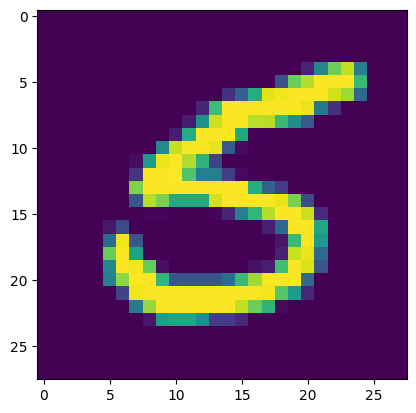

In [3]:
#Like we discussed in the last meeting, data is the more involved and difficult part of data science.
#Let's make sure we examine our data before we start training.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#This line isn't python.  It's a special instruction to the Jupyter notebook to allow us to use matplotlib to make figures in the notebook.
%matplotlib inline

#We also need to import some more python packages.  Notice the use of "from" here.
from matplotlib import pyplot
import numpy

#We want to select an image to plot at random.  To do this, we need to generate a random number using Numpy.
indexes = list(range(60000))
i = numpy.random.choice(indexes)

#Now we will "imshow" the i'th image of the train_images.
pyplot.imshow(x_train[i])

In [4]:
#Did you see how the images were labeled?  This is important!
#Let's have a look at the first 10 labels.
#We can do this using python slices, "array[start:stop]".
#train_labels = mnist.train_labels()
print(y_train[0:10])
#The images are labeled by the number represented.
#This is actually not good for neural networks.
#We want to classify each image according to the written number, but the current labels imply a numerical relationship.
#We don't usually want to imply a > or < relationship during a classification problem.
#To fix this and help our neural network perform better, we will change this to one-hot-encoding.

[5 0 4 1 9 2 1 3 1 4]


In [5]:
#One-hot-encoding will represent 5 as 0000010000.
# 3 = 0001000000
# 9 = 0000000001

#Let's make a python function for one-hot-encoding the digits.

def one_hot(label):
  new_label = numpy.zeros(10)
  new_label[label] = 1
  return new_label

In [6]:
# We need another function to give one-hot-encodings to all the labels in a list of labels.
def one_hot_array(labels):
  #Let's make an empty list to store our results.
  new_labels = []

  #We'll use a "for" loop to look at each label in the list.
  for label in labels:
    new_labels.append(one_hot(label))

  #Before we're done, we need to turn the list into a numpy array.  We almost always use numpy arrays with neural networks.
  return numpy.asarray(new_labels)

In [7]:
#Now, let's finally build a neural network!
#We'll use the "keras" package for this.
#We need a few things "from" keras.
from keras import Model
from keras.layers import Dense, Input, Flatten

#Neural networks are composed of layers.
#Let's define the first layer.  Be sure to insert the image size!
#image = Input(shape=(IMAGE_SIZE, IMAGE_SIZE))
image = Input(shape=(28, 28))
#This first layer is where our images enter the neural network.

#Let's make a new layer to flatten the image into a 1D array.
flat = Flatten()

#Now, we need to actually connect the second layer to the first.
flat = flat(image)
#This tells keras that the layer "flat" takes its inputs from the layer "image".

#Next layer.  This is the first where computation will actually take place.
dense1 = Dense(784, activation='relu')
dense1 = dense1(flat)
#This makes a fully-connected neural network layer with 784 neurons with the 'relu' activation.

#Now, you make a fully-connected neural network layer with 391 neurons and connect it to "dense1".
dense2 = Dense(391, activation ='relu')
dense2 = dense2(dense1)

#Now we need one more fully-connected layer with 10 neurons to serve as the output.
#This time, use the 'softmax' activation.
#'softmax' helps with classification tasks.
dense3 = Dense(10, activation = 'relu')
dense3 = dense3(dense2)

#Now that all our layers are created, we have to define our model
model = Model(image, dense3)
#This creates a keras model with image as its input and dense3 as its output.

#Let's ask Keras to give us a summary of the model.
#This will show us each layer, and how many parameters the model has.
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 391)                 │         306,935 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           3,920 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 926,295 (3.53 MB)

 Trainable params: 926,295 (3.53 MB)

 Non-trainable params: 0 (0.00 B)

Each of the trainable parameters in this model represents a weight or bias for one of it's artificial neurons.  When we train the neural network, we adjust the weights until the neural network learns to give correct answers.

How many trainable parameters are in this model?
How many non-trainable?

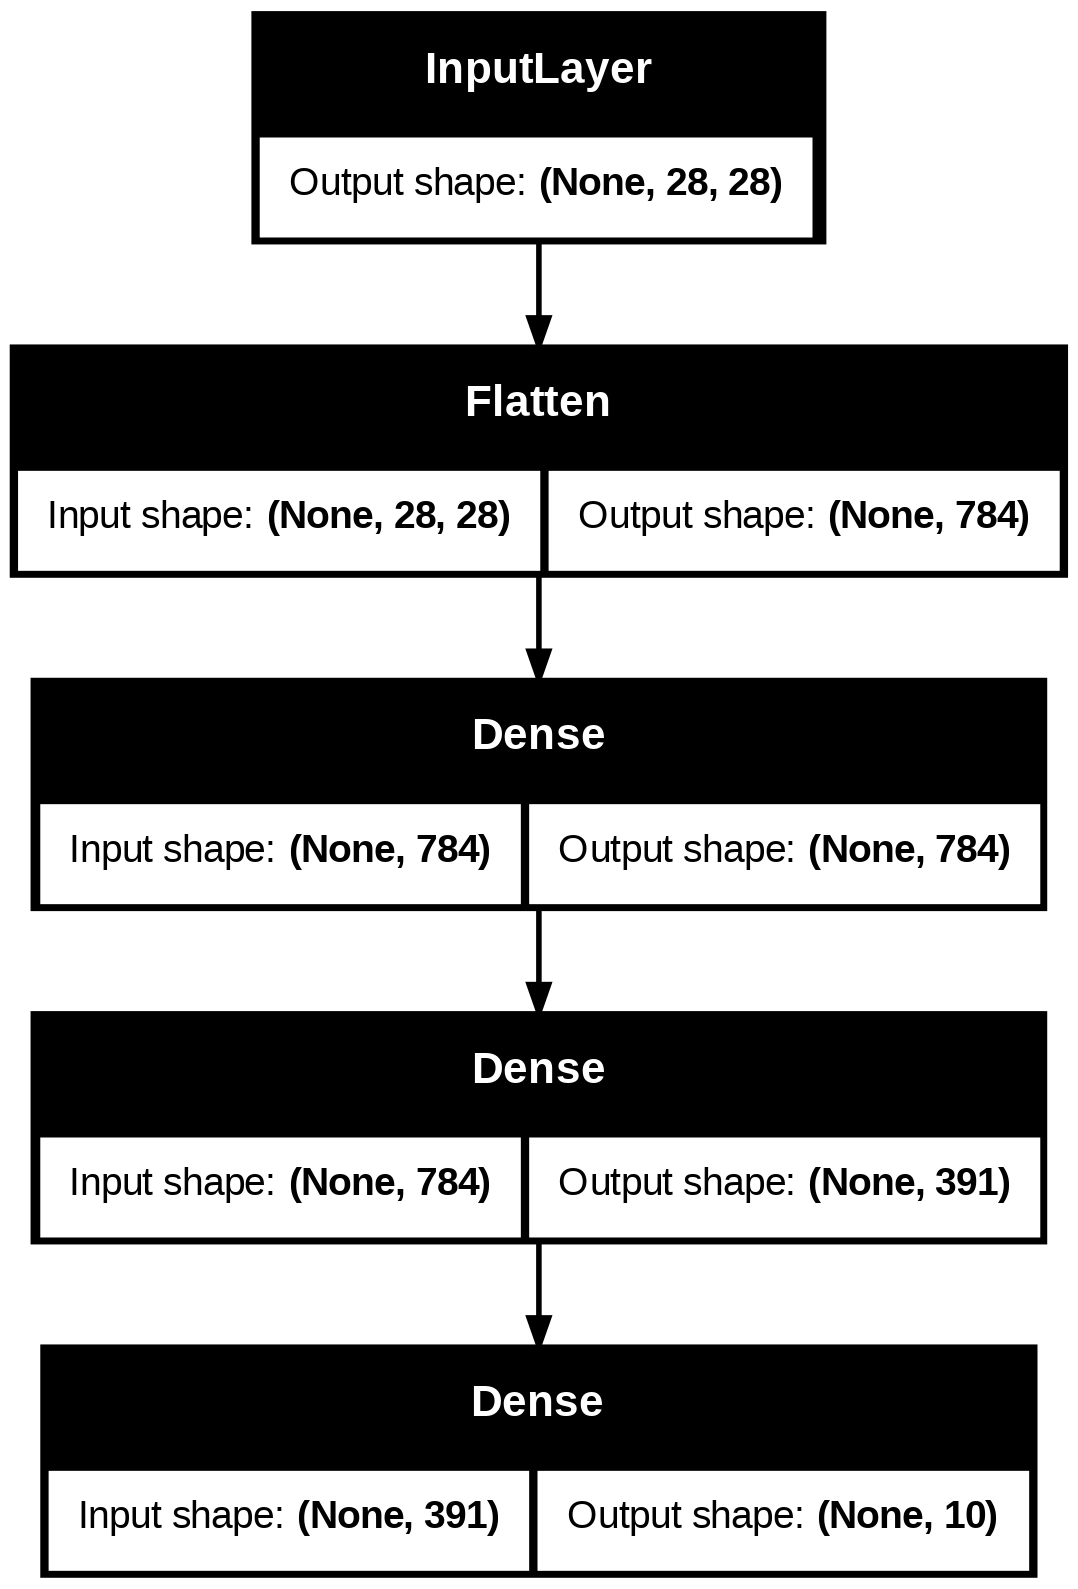

In [8]:
#Let's see what this model looks like.
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [9]:
#Before we can actually train the model, it must have a loss function.
#The loss function tells the optimizer how well the model is doing.
#The optimizer will try to make the loss go as small as possible by adjusting the model's weights.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
#Now, we need to train the neural network.  By default, this will only train for 1 epoch.
model.fit(x_train, one_hot_array(y_train), epochs = 3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.1346 - loss: nan
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 19ms/step - accuracy: 0.0978 - loss: nan
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.0994 - loss: nan


In [11]:
#Next, let's evaluate the model's performance on the testing dataset.
model.evaluate(x_test, one_hot_array(y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0924 - loss: nan


[nan, 0.09799999743700027]

How accurate is your model?

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


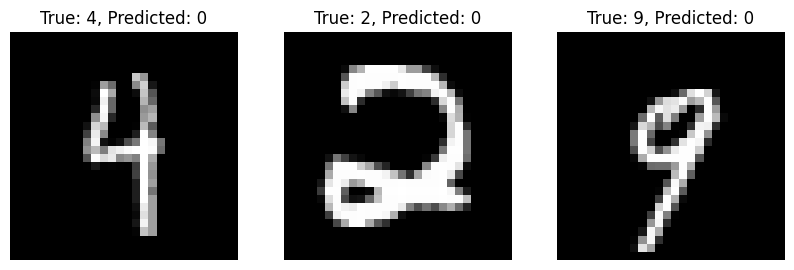

In [12]:
 #Use "model.predict" to get predictions for the test images.
#Pick three images at random, show the images, and show the prediction.
# Use model.predict to get predictions for the test images
predictions = model.predict(x_test)

# Pick three images at random
random_indices = numpy.random.choice(len(x_test), size=3, replace=False)

# Set up the plot
pyplot.figure(figsize=(10, 5))

for i, idx in enumerate(random_indices):
    # Display the image
    pyplot.subplot(1, 3, i + 1)
    pyplot.imshow(x_test[idx], cmap='gray')  # Display in grayscale
    predicted_label = numpy.argmax(predictions[idx])  # Get the predicted class
    true_label = y_test[idx]  # Get the true label
    pyplot.title(f'True: {true_label}, Predicted: {predicted_label}')
    pyplot.axis('off')

# Show the plot
pyplot.show()


Even this very basic model is immediately good at predicting the MNIST dataset.  Is there still room to improve?  What happens if we add more epochs to training?  Let's create a plot that shows the training loss vs the testing loss as more epochs are added.  At what point does overfitting occur?  

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8498 - loss: 0.4724 - val_accuracy: 0.9646 - val_loss: 0.1197
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9496 - loss: 0.1671 - val_accuracy: 0.9698 - val_loss: 0.0970
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9564 - loss: 0.1440 - val_accuracy: 0.9771 - val_loss: 0.0787
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9627 - loss: 0.1264 - val_accuracy: 0.9775 - val_loss: 0.0756
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9672 - loss: 0.1095 - val_accuracy: 0.9789 - val_loss: 0.0715


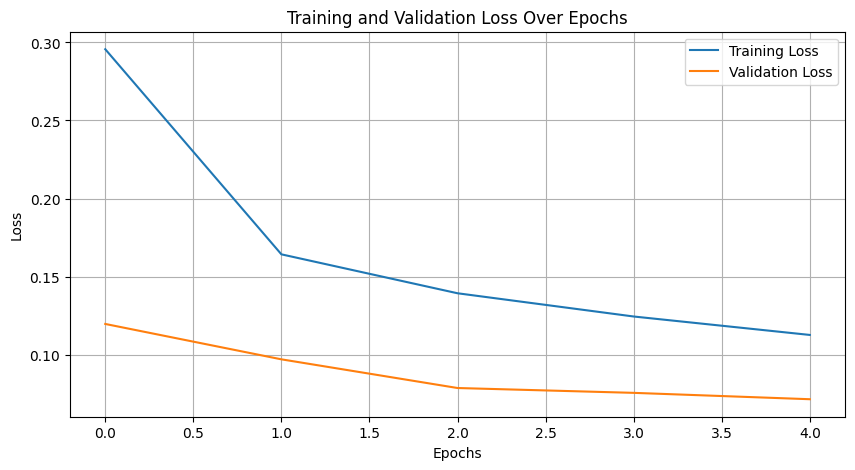

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9754 - loss: 0.0850
Test Loss: 0.07149144262075424, Test Accuracy: 0.9789000153541565


In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # For loading the MNIST dataset
from tensorflow.keras.models import Model  # For creating the model
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout  # For building the network layers
from tensorflow.keras.utils import to_categorical  # For one-hot encoding labels

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data: Convert pixel values to float and scale to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels: Convert class labels to a binary matrix (e.g., 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the model architecture
image = Input(shape=(28, 28))  # Input layer for 28x28 images
flat = Flatten()(image)  # Flatten the image into a 1D array

# First dense layer with 784 neurons and ReLU activation
dense1 = Dense(784, activation='relu')(flat)

# Add dropout layer to reduce overfitting (50% dropout rate)
dropout1 = Dropout(0.5)(dense1)

# Second dense layer with 391 neurons and ReLU activation
dense2 = Dense(391, activation='relu')(dropout1)

# Add another dropout layer to reduce overfitting
dropout2 = Dropout(0.5)(dense2)

# Output layer with 10 neurons (for 10 classes) and softmax activation
dense3 = Dense(10, activation='softmax')(dropout2)

# Create the model: Specify input and output layers
model = Model(image, dense3)

# Compile the model: Specify the loss function, optimizer, and evaluation metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and save the training history
history = model.fit(x_train, y_train,
                    epochs=5,  # Number of epochs to train
                    validation_data=(x_test, y_test))  # Use test data for validation

# Plot training and validation loss
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Training and Validation Loss Over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Show legend
plt.grid()  # Show grid
plt.show()  # Display the plot

# Evaluate the model on the test set and print loss and accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


After seeing these plots, do you think any other neural network structures will perform better?  Try creating one or two other different neural networks and produce the same plots for them.

Deeply fully connected network

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8130 - loss: 0.5876 - val_accuracy: 0.9625 - val_loss: 0.1259
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9400 - loss: 0.2096 - val_accuracy: 0.9660 - val_loss: 0.1163
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9532 - loss: 0.1659 - val_accuracy: 0.9740 - val_loss: 0.0893
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9567 - loss: 0.1565 - val_accuracy: 0.9735 - val_loss: 0.0894
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9602 - loss: 0.1466 - val_accuracy: 0.9750 - val_loss: 0.0836


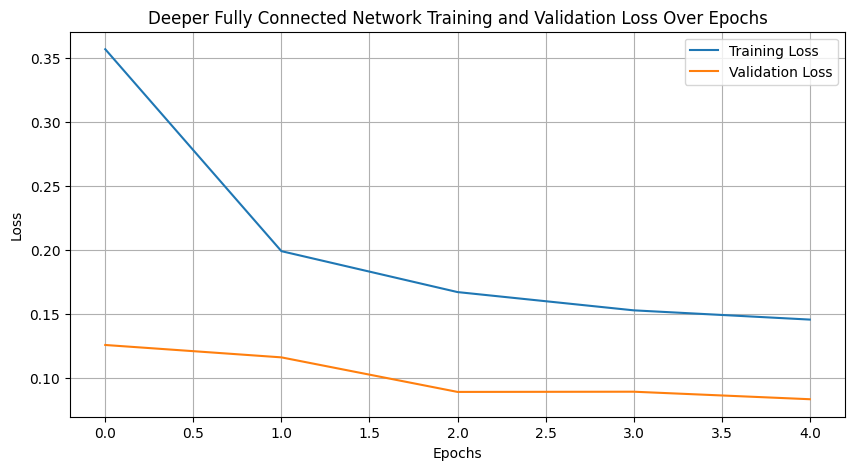

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout

# Step 1: Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data for the fully connected network
x_train = x_train.reshape(-1, 28 * 28)  # Flatten to (num_samples, 784)
x_test = x_test.reshape(-1, 28 * 28)    # Flatten to (num_samples, 784)

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 2: Define a deeper fully connected network
deep_input = Input(shape=(28 * 28,))  # Input layer for flattened images
flat = Flatten()(deep_input)  # Flatten layer

# Add several dense layers
x = Dense(1024, activation='relu')(deep_input)  # First dense layer
x = Dropout(0.5)(x)  # Dropout layer
x = Dense(512, activation='relu')(x)  # Second dense layer
x = Dropout(0.5)(x)  # Dropout layer
x = Dense(256, activation='relu')(x)  # Third dense layer
x = Dropout(0.5)(x)  # Dropout layer
deep_output = Dense(10, activation='softmax')(x)  # Output layer

# Create the deep model
deep_model = Model(deep_input, deep_output)

# Step 3: Compile the deep model
deep_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Train the deep model and save the history
deep_history = deep_model.fit(x_train, y_train,
                              epochs=5,
                              validation_data=(x_test, y_test))

# Step 5: Plot training and validation loss for the deeper network
plt.figure(figsize=(10, 5))
plt.plot(deep_history.history['loss'], label='Training Loss')
plt.plot(deep_history.history['val_loss'], label='Validation Loss')
plt.title('Deeper Fully Connected Network Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


Convolutional Neural Network

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.8587 - loss: 0.4452 - val_accuracy: 0.9813 - val_loss: 0.0545
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9753 - loss: 0.0822 - val_accuracy: 0.9893 - val_loss: 0.0318
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9820 - loss: 0.0580 - val_accuracy: 0.9911 - val_loss: 0.0252
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9847 - loss: 0.0469 - val_accuracy: 0.9919 - val_loss: 0.0266
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9876 - loss: 0.0408 - val_accuracy: 0.9920 - val_loss: 0.0235


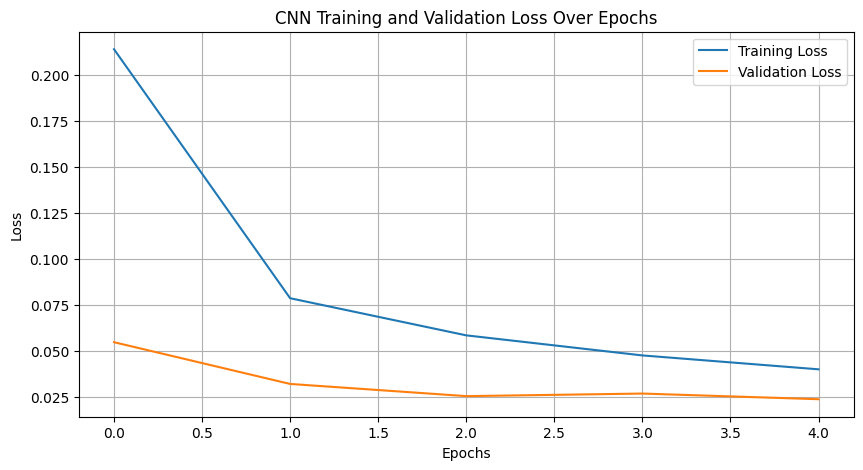

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Reshape the data for CNN (add channel dimension)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, height, width, channels)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Define the CNN architecture
cnn_model = Model()
cnn_input = Input(shape=(28, 28, 1))  # Input layer for CNN
x = Conv2D(32, (3, 3), activation='relu')(cnn_input)  # First convolutional layer
x = MaxPooling2D((2, 2))(x)  # Max pooling layer
x = Conv2D(64, (3, 3), activation='relu')(x)  # Second convolutional layer
x = MaxPooling2D((2, 2))(x)  # Max pooling layer
x = Flatten()(x)  # Flatten layer
x = Dense(128, activation='relu')(x)  # Dense layer
x = Dropout(0.5)(x)  # Dropout layer
cnn_output = Dense(10, activation='softmax')(x)  # Output layer

# Create CNN model
cnn_model = Model(cnn_input, cnn_output)

# Compile the CNN model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model and save the history
cnn_history = cnn_model.fit(x_train_cnn, y_train,
                             epochs=5,
                             validation_data=(x_test_cnn, y_test))

# Plot training and validation loss for CNN
plt.figure(figsize=(10, 5))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
